In [1]:
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:

np.random.seed(42)
n = 50000

In [3]:
# Create DataFrame with n customer IDs
df = pd.DataFrame({
    "customer_id": [f"{i:05d}" for i in range(1, n+1)]
})

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  50000 non-null  object
dtypes: object(1)
memory usage: 390.8+ KB


In [5]:
df.tail()

,customer_id
49995,49996
49996,49997
49997,49998
49998,49999
49999,50000


In [6]:
cities = ['Mumbai', 'Ahmedabad', 'Delhi', 'Banglore', 'Hyderabad', 'Gurgaon', 'Noida']

item = random.choice(cities)

item

'Gurgaon'

In [7]:
df['location'] = [random.choice(cities) for i in range(n)]

In [8]:
len(df)

50000

count    50000.00000
mean        36.86914
std         12.07240
min         18.00000
25%         27.00000
50%         34.00000
75%         46.00000
max         65.00000
Name: age, dtype: float64


<Axes: >

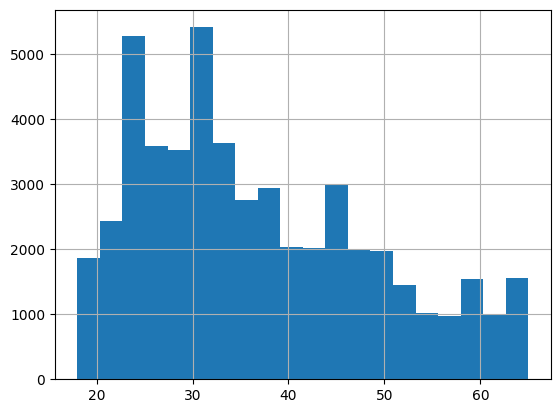

In [9]:

# Sample sizes

age_weights = [0.05, 0.5, 0.3, 0.15]

# Age ranges
age_ranges = [
    (18, 21),
    (22, 35),
    (36, 50),
    (51, 65)
]

# Generate age values based on weighted ranges
def generate_age():
    range_idx = np.random.choice(len(age_ranges), p=age_weights)
    return np.random.randint(age_ranges[range_idx][0], age_ranges[range_idx][1] + 1)

df['age'] = [generate_age() for _ in range(n)]

# Check result
print(df['age'].describe())
df['age'].hist(bins=20)


{'whiskers': [<matplotlib.lines.Line2D at 0x217d8105670>,
 'caps': [<matplotlib.lines.Line2D at 0x217d8107830>,
 'boxes': [<matplotlib.lines.Line2D at 0x217d5f70ad0>],
 'medians': [<matplotlib.lines.Line2D at 0x217d8107e30>],
 'fliers': [<matplotlib.lines.Line2D at 0x217d813c170>],
 'means': []}

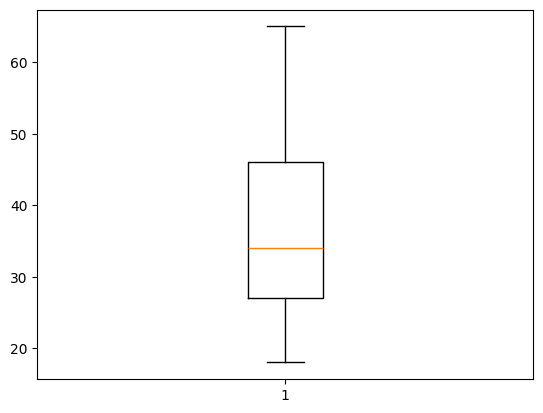

In [10]:
plt.boxplot(df['age'])

In [11]:
df.index = range(1, len(df) + 1)
df

,customer_id,location,age
1,00001,Noida,34
2,00002,Mumbai,29
3,00003,Gurgaon,42
4,00004,Gurgaon,28
5,00005,Ahmedabad,29
...,...,...,...
49996,49996,Banglore,52
49997,49997,Banglore,28
49998,49998,Delhi,49
49999,49999,Delhi,33


In [12]:
sex = ['M', 'F']

sex_weights = [0.55, 0.45]

df['gender'] = [np.random.choice(sex , p=sex_weights) for i in range(1, n+1)]

In [13]:
print(len(df[df['gender'] == 'M']))
print(len(df[df['gender'] == 'F']))

27493
22507


In [14]:
df

,customer_id,location,age,gender
1,00001,Noida,34,F
2,00002,Mumbai,29,F
3,00003,Gurgaon,42,M
4,00004,Gurgaon,28,M
5,00005,Ahmedabad,29,M
...,...,...,...,...
49996,49996,Banglore,52,M
49997,49997,Banglore,28,F
49998,49998,Delhi,49,M
49999,49999,Delhi,33,F


In [15]:
# Function to assign income based on age and gender
def simulate_income(age, gender):
    if age < 22:
        base = 12000
    elif age < 30:
        base = 50000
    elif age < 40:
        base = 75000
    elif age < 50:
        base = 100000
    elif age < 56:
        base = 90000
    else:
        base = 30000

    # Add gender adjustment
    gender_factor = 1.0 if gender == 'M' else 0.9
    
    # Add randomness
    noise = np.random.normal(0, 4000)

    return max(int(base * gender_factor + noise), 8000)

# Apply income simulation
df['monthly_income'] = df.apply(lambda row: simulate_income(row['age'], row['gender']), axis=1)

# Optional: preview
print(df.head())


  customer_id   location  age gender  monthly_income
1       00001      Noida   34      F           68402
2       00002     Mumbai   29      F           39708
3       00003    Gurgaon   42      M          106087
4       00004    Gurgaon   28      M           49975
5       00005  Ahmedabad   29      M           55402


In [16]:
def generate_realistic_emi_outflow(income, age):
    # 1. No-loan population (age-dependent)
    if age < 25:
        no_loan_prob = 0.25  # young, fewer loans
    elif age < 40:
        no_loan_prob = 0.10  # likely to have loans
    elif age < 60:
        no_loan_prob = 0.15  # some loans, often winding down
    elif income < 15000:
        no_loan_prob = 0.30  # young, fewer loans
    elif income < 60000:
        no_loan_prob = 0.15  # likely to have loans
    elif income < 120000:
        no_loan_prob = 0.05  # some loans, often winding down
    else:
        no_loan_prob = 0.20

    if np.random.rand() <= no_loan_prob:
        return 0

    # 2. EMI behavior distribution (age-dependent bin adjustment)
    if age < 30:
        weights = [0.25, 0.50, 0.20, 0.05]  # more moderate, few high
    elif age < 50:
        weights = [0.10, 0.40, 0.35, 0.15]  # more mid-high
    else:
        weights = [0.30, 0.45, 0.20, 0.05]  # lower risk

    ratio_bins = [
        (0.00, 0.10),  # low EMI
        (0.10, 0.30),  # moderate
        (0.30, 0.50),  # high
        (0.50, 0.60),  # risky     ]
    ]

    bin_idx = np.random.choice(len(ratio_bins), p=weights)
    low, high = ratio_bins[bin_idx]
    emi_ratio = np.random.uniform(low, high)

    emi = income * emi_ratio

    # 3. Rare extreme outliers
    if np.random.rand() < 0.01:
        emi = income * np.random.uniform(1.0, 1.5)

    # 4. Noise
    emi += np.random.normal(0, 1000)

    return max(int(emi), 0)

# Apply to dataset
df['monthly_emi_outflow'] = df.apply(
    lambda row: generate_realistic_emi_outflow(row['monthly_income'], row['age']),
    axis=1
)

In [17]:
df[df['monthly_emi_outflow'] < 0]

,customer_id,location,age,gender,monthly_income,monthly_emi_outflow


In [18]:
len(df[df['monthly_emi_outflow'] == 0])

7965

In [19]:
df

,customer_id,location,age,gender,monthly_income,monthly_emi_outflow
1,00001,Noida,34,F,68402,11017
2,00002,Mumbai,29,F,39708,6526
3,00003,Gurgaon,42,M,106087,20145
4,00004,Gurgaon,28,M,49975,4656
5,00005,Ahmedabad,29,M,55402,12311
...,...,...,...,...,...,...
49996,49996,Banglore,52,M,88707,39135
49997,49997,Banglore,28,F,45427,20975
49998,49998,Delhi,49,M,105773,51829
49999,49999,Delhi,33,F,64071,8949


In [20]:
def simulate_open_loans_with_outliers(age, emi):
    # 1. Handle outliers: 1% chance of very high loan count

    if emi == 0:
        return 0
    
    if np.random.rand() < 0.01:
        return np.random.randint(6, 11)  # Outlier: 6 to 10 loans

    # 2. Regular pattern by age
    if age < 22:
        base = np.random.choice([0, 1, 2], p=[0.4, 0.5, 0.1])
    elif age < 30:
        base = np.random.choice([0,1,2,3], p=[0.1,0.3,0.4,0.2])
    elif age < 45:
        base = np.random.choice([1,2,3,4,5], p=[0.1,0.3,0.3,0.2,0.1])
    else:
        base = np.random.choice([0,1,2,3], p=[0.1,0.3,0.4,0.2])
    
    # 3. Add random ±1 noise (with clamp to 0+)
    noise = np.random.choice([-1, 0, 1], p=[0.1, 0.8, 0.1])
    return max(base + noise, (1 if emi > 0 else 0))

# Apply to DataFrame
df['num_open_loans'] = df.apply(lambda row: simulate_open_loans_with_outliers(row['age'], row['monthly_emi_outflow']), axis=1)


In [21]:
len(df[df['num_open_loans'] < 0])

0

In [22]:
df

,customer_id,location,age,gender,monthly_income,monthly_emi_outflow,num_open_loans
1,00001,Noida,34,F,68402,11017,1
2,00002,Mumbai,29,F,39708,6526,2
3,00003,Gurgaon,42,M,106087,20145,5
4,00004,Gurgaon,28,M,49975,4656,1
5,00005,Ahmedabad,29,M,55402,12311,2
...,...,...,...,...,...,...,...
49996,49996,Banglore,52,M,88707,39135,2
49997,49997,Banglore,28,F,45427,20975,1
49998,49998,Delhi,49,M,105773,51829,2
49999,49999,Delhi,33,F,64071,8949,2


In [23]:
print(len(df[df['num_open_loans'] == 0]))

7965


In [24]:
df[df['monthly_emi_outflow'] == 0]

,customer_id,location,age,gender,monthly_income,monthly_emi_outflow,num_open_loans
8,00008,Ahmedabad,29,M,43432,0,0
13,00013,Hyderabad,22,M,51740,0,0
16,00016,Hyderabad,35,F,65504,0,0
31,00031,Mumbai,27,F,48225,0,0
45,00045,Gurgaon,18,F,16339,0,0
...,...,...,...,...,...,...,...
49954,49954,Hyderabad,35,F,70760,0,0
49961,49961,Noida,65,F,23012,0,0
49977,49977,Ahmedabad,23,M,47203,0,0
49980,49980,Mumbai,64,F,17422,0,0


In [25]:
# Simulate the credit limit based on various factors
def simulate_credit_limit(income, age):
    base_limit = income * 5 * (1 + (age / 100)) # Base on annual income and age
    # Add final noise
    #  Mean 50000, std 20000
    noise = np.random.normal(50000, 20000)
    return int(base_limit + noise)

# Apply the credit limit simulation
df['total_credit_limit'] = df.apply(
    lambda row: simulate_credit_limit(
        row['monthly_income'],
        row['age'],
    ),
    axis=1
)

# Display the first few rows with the new column
df

,customer_id,location,age,gender,monthly_income,monthly_emi_outflow,num_open_loans,total_credit_limit
1,00001,Noida,34,F,68402,11017,1,514488
2,00002,Mumbai,29,F,39708,6526,2,288551
3,00003,Gurgaon,42,M,106087,20145,5,759751
4,00004,Gurgaon,28,M,49975,4656,1,323817
5,00005,Ahmedabad,29,M,55402,12311,2,414531
...,...,...,...,...,...,...,...,...
49996,49996,Banglore,52,M,88707,39135,2,721047
49997,49997,Banglore,28,F,45427,20975,1,338544
49998,49998,Delhi,49,M,105773,51829,2,844069
49999,49999,Delhi,33,F,64071,8949,2,521470


In [26]:
df[df['total_credit_limit'] < 0]

,customer_id,location,age,gender,monthly_income,monthly_emi_outflow,num_open_loans,total_credit_limit


In [27]:
def simulate_months_since_last_default():
    return np.random.choice(
        [240, 0, 3, 6, 12, 24, 36, 48],
        p=[0.7, 0.01, 0.03, 0.06, 0.02, 0.03, 0.07, 0.08]  # ~70% never defaulted
    )

df['months_since_last_default'] = df.apply(
    lambda _: simulate_months_since_last_default(),
    axis=1
)

In [28]:
len(df[df['months_since_last_default'] == 48])

4095

In [29]:
def calculate_outstanding(emi, total_credit):
    if emi == 0:
        return 0  
    
    # Choose number between 3 to 24 -> Assume that many monthly_emi has been paid, subtract it from total_credit to get outstanding
    multiplier = np.random.randint(3, 24)
    return round((total_credit - ((np.random.uniform(0.2, 0.7)*total_credit) if (emi*multiplier > total_credit) else emi*multiplier)), 2)
    

# Apply to DataFrame
df['current_outstanding'] = df.apply(
    lambda row: calculate_outstanding(row['monthly_emi_outflow'], row['total_credit_limit']),
    axis=1
)


In [30]:
df[df['current_outstanding'] > (df['total_credit_limit'] - df['monthly_emi_outflow'])]

,customer_id,location,age,gender,monthly_income,monthly_emi_outflow,num_open_loans,total_credit_limit,months_since_last_default,current_outstanding
15917,15917,Ahmedabad,28,F,47517,70050,1,336843,240,268494.89


In [31]:
df

,customer_id,location,age,gender,monthly_income,monthly_emi_outflow,num_open_loans,total_credit_limit,months_since_last_default,current_outstanding
1,00001,Noida,34,F,68402,11017,1,514488,240,470420.00
2,00002,Mumbai,29,F,39708,6526,2,288551,3,197187.00
3,00003,Gurgaon,42,M,106087,20145,5,759751,240,336706.00
4,00004,Gurgaon,28,M,49975,4656,1,323817,240,291225.00
5,00005,Ahmedabad,29,M,55402,12311,2,414531,240,192933.00
...,...,...,...,...,...,...,...,...,...,...
49996,49996,Banglore,52,M,88707,39135,2,721047,240,475247.12
49997,49997,Banglore,28,F,45427,20975,1,338544,240,23919.00
49998,49998,Delhi,49,M,105773,51829,2,844069,240,533095.00
49999,49999,Delhi,33,F,64071,8949,2,521470,240,369337.00


In [32]:
def simulate_dpd(emi, income, outstanding, months_since_default, open_loans):
    stress = (emi / income) + (outstanding / (income * 6)) + (1 / (months_since_default + 1))
    stress *= (open_loans / 3 if open_loans > 0 else 0.5)  # scale with loan count
    
    # Base logic
    if stress < 0.7:
        return np.random.choice([0, 1, 5], p=[0.75, 0.2, 0.05])
    elif stress < 1.2:
        return np.random.choice([0, 5, 10, 15], p=[0.4, 0.3, 0.2, 0.1])
    elif stress < 2.0:
        return np.random.choice([10, 20, 30], p=[0.4, 0.4, 0.2])
    else:
        return np.random.choice([30, 60], p=[0.6, 0.4])

df['dpd_last_3_months'] = df.apply(
    lambda row: simulate_dpd(
        row['monthly_emi_outflow'],
        row['monthly_income'],
        row['current_outstanding'],
        row['months_since_last_default'],
        row['num_open_loans']
    ), axis=1
)

In [33]:
df

,customer_id,location,age,gender,monthly_income,monthly_emi_outflow,num_open_loans,total_credit_limit,months_since_last_default,current_outstanding,dpd_last_3_months
1,00001,Noida,34,F,68402,11017,1,514488,240,470420.00,1
2,00002,Mumbai,29,F,39708,6526,2,288551,3,197187.00,0
3,00003,Gurgaon,42,M,106087,20145,5,759751,240,336706.00,20
4,00004,Gurgaon,28,M,49975,4656,1,323817,240,291225.00,0
5,00005,Ahmedabad,29,M,55402,12311,2,414531,240,192933.00,0
...,...,...,...,...,...,...,...,...,...,...,...
49996,49996,Banglore,52,M,88707,39135,2,721047,240,475247.12,0
49997,49997,Banglore,28,F,45427,20975,1,338544,240,23919.00,0
49998,49998,Delhi,49,M,105773,51829,2,844069,240,533095.00,10
49999,49999,Delhi,33,F,64071,8949,2,521470,240,369337.00,5


In [34]:
df.columns

Index(['customer_id', 'location', 'age', 'gender', 'monthly_income',
       'monthly_emi_outflow', 'num_open_loans', 'total_credit_limit',
       'months_since_last_default', 'current_outstanding',
       'dpd_last_3_months'],
      dtype='object')

In [35]:
def calculate_inquiry_lambda(row):
    current_lambda = 0.2
    income = max(row['monthly_income'], 1)

    if row['age'] < 25:
        current_lambda += 0.3
    elif 25 <= row['age'] <= 35:
        current_lambda += 0.15
    elif row['age'] > 55:
        current_lambda += 0.05

    if row['gender'] == 'female':
        current_lambda += 0.02

    if income < 20000:
        current_lambda += 0.20
    elif income > 100000:
        current_lambda += 0.15

    if row['monthly_emi_outflow'] > 0.4 * income:
        current_lambda += 0.4
    if row['current_outstanding'] > 6 * income:
        current_lambda += 0.3
    if row['num_open_loans'] > 4:
        current_lambda += 0.2

    if row['dpd_last_3_months'] > 0:
        current_lambda += 0.6
    if row['dpd_last_3_months'] > 10:
        current_lambda += 0.8

    if row['months_since_last_default'] < 12 and row['months_since_last_default'] != 0:
        current_lambda += 0.7
    elif row['months_since_last_default'] > 24:
        current_lambda -= 0.1

    if row['total_credit_limit'] < income * 15:
        current_lambda += 0.2
    elif row['total_credit_limit'] > income * 40:
        current_lambda -= 0.1

    # slight randomness
    current_lambda += np.random.normal(0, 0.05)

    return min(max(current_lambda, 0.05), 7.0)

df['inquiry_lambda'] = df.apply(calculate_inquiry_lambda, axis=1)
df['num_hard_inquiries_last_6'] = df['inquiry_lambda'].apply(lambda lam: np.random.poisson(lam))
df.drop('inquiry_lambda', axis=1, inplace=True)

In [36]:
df['credit_utilization_ratio'] = df['current_outstanding']/df['total_credit_limit']


In [37]:
df

,customer_id,location,age,gender,monthly_income,monthly_emi_outflow,num_open_loans,total_credit_limit,months_since_last_default,current_outstanding,dpd_last_3_months,num_hard_inquiries_last_6,credit_utilization_ratio
1,00001,Noida,34,F,68402,11017,1,514488,240,470420.00,1,1,0.914346
2,00002,Mumbai,29,F,39708,6526,2,288551,3,197187.00,0,0,0.683370
3,00003,Gurgaon,42,M,106087,20145,5,759751,240,336706.00,20,4,0.443179
4,00004,Gurgaon,28,M,49975,4656,1,323817,240,291225.00,0,0,0.899351
5,00005,Ahmedabad,29,M,55402,12311,2,414531,240,192933.00,0,2,0.465425
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,49996,Banglore,52,M,88707,39135,2,721047,240,475247.12,0,0,0.659107
49997,49997,Banglore,28,F,45427,20975,1,338544,240,23919.00,0,1,0.070653
49998,49998,Delhi,49,M,105773,51829,2,844069,240,533095.00,10,2,0.631578
49999,49999,Delhi,33,F,64071,8949,2,521470,240,369337.00,5,1,0.708261


In [38]:
def simulate_recent_credit_card_usage(row):
    base_usage = 0.30
    if row['age'] < 30:
        base_usage += 0.08
    elif row['age'] > 55:
        base_usage -= 0.05
    if row['monthly_income'] < 25000:
        base_usage += 0.07
    elif row['monthly_income'] > 90000:
        base_usage += 0.03
    if row['dpd_last_3_months'] > 0:
        base_usage += 0.15
    if row['monthly_emi_outflow'] > 0.5 * row['monthly_income']:
        base_usage += 0.1
    if row['num_open_loans'] > 4:
        base_usage += 0.05
    base_usage += row['credit_utilization_ratio'] * 0.4
    noise = np.random.normal(0, 0.04)
    usage = base_usage + noise
    usage = max(0.0, usage)
    usage = min(1.2, usage)
    return usage

df['recent_credit_card_usage'] = df.apply(simulate_recent_credit_card_usage, axis=1)


In [39]:
def simulate_recent_loan_disbursed_amount(row):

    # Initialize potential disbursed amount (e.g., 6 to 18 months of income as a base)
    # The random component makes each simulation slightly different.
    base_disbursal = row['monthly_income'] * np.random.uniform(6, 18) 
    
    # Further limit by a fraction of total credit limit, reflecting borrowing capacity
    if row['total_credit_limit'] > 0:
        base_disbursal = min(base_disbursal, row['total_credit_limit'] * np.random.uniform(0.2, 0.6))

    penalty_multiplier = 1.0 # Multiplier that decreases with higher risk

    # --- Age Impact ---
    # Prime ages (e.g., 30-55) might receive larger loans for major life events.
    if row['age'] < 25:
        penalty_multiplier *= 0.6 # Younger individuals often get smaller loans
    elif row['age'] > 60:
        penalty_multiplier *= 0.8 # Older individuals might seek smaller loans or less new debt

    # --- Debt and EMI Burden Impact ---
    # High existing debt or EMI outflow reduces the amount lenders are willing to disburse.
    if row['monthly_emi_outflow'] > 0.45 * row['monthly_income']:
        penalty_multiplier *= 0.70 # Significant EMI burden
    if row['num_open_loans'] > 5:
        penalty_multiplier *= 0.80 # Too many open loans

    # --- Credit Risk Indicators (Strong Penalties) ---
    # Past defaults or high DPD severely impact eligibility and amount.
    if row['dpd_last_3_months'] > 0:
        penalty_multiplier *= 0.40 # Any DPD is a red flag
    if row['dpd_last_3_months'] > 15:
        penalty_multiplier *= 0.20 # Severe DPD
    if row['months_since_last_default'] < 12 and row['months_since_last_default'] != 0:
        penalty_multiplier *= 0.30 # Recent default
    
    # --- Inquiries Impact ---
    # Many recent inquiries can signal desperation or prior rejections.
    if row['num_hard_inquiries_last_6'] > 4:
        penalty_multiplier *= 0.70
    if row['num_hard_inquiries_last_6'] > 8:
        penalty_multiplier *= 0.50

    # High credit utilization suggests less capacity for new debt.
    if row['credit_utilization_ratio'] > 0.6:
        penalty_multiplier *= 0.75
    if row['recent_credit_card_usage'] > 0.9:
        penalty_multiplier *= 0.65

    # Apply penalties to the base disbursal amount
    disbursed_amount = base_disbursal * penalty_multiplier

    # --- Add Noise ---
    # Introduce random variation to reflect real-world unpredictability.
    noise = np.random.normal(0, row['monthly_income'] * 0.8) # Noise relative to income

    final_amount = int(disbursed_amount + noise)

    # --- Introduce Outliers and Zero Disbursals ---
    # Some customers, especially high-risk ones, might not receive any loan.
    # Others might receive unusually high amounts (outliers).

    # High risk often leads to zero loan
    if (row['dpd_last_3_months'] > 25 or
        row['months_since_last_default'] < 6 or
        row['credit_utilization_ratio'] > 0.99 or
        row['num_hard_inquiries_last_6'] > 10):
        if np.random.rand() < 0.8: # 80% chance of no loan for extreme risk
            final_amount = 0
    elif final_amount < row['monthly_income'] * 2: # If calculated amount is very small
        if np.random.rand() < 0.4: # 40% chance of no loan instead of a tiny one
            final_amount = 0
        else:
            final_amount = max(final_amount, row['monthly_income'] * 2) # Ensure a reasonable minimum loan amount if disbursed

    # Ensure amount is non-negative
    final_amount = max(0, final_amount)

    # Introduce a small chance of a very large outlier loan (e.g., for very prime customers)
    if np.random.rand() < 0.005 and final_amount > 0: # 0.5% chance for non-zero loans
         if row['dpd_last_3_months'] == 0 and row['months_since_last_default'] >= 24 and row['credit_utilization_ratio'] < 0.2:
            final_amount = max(final_amount, row['monthly_income'] * np.random.uniform(25, 60)) # Up to 25-60 months of income

    return final_amount

df['recent_loan_disbursed_amount'] = df.apply(simulate_recent_loan_disbursed_amount, axis = 1)

In [40]:
df

,customer_id,location,age,gender,monthly_income,monthly_emi_outflow,num_open_loans,total_credit_limit,months_since_last_default,current_outstanding,dpd_last_3_months,num_hard_inquiries_last_6,credit_utilization_ratio,recent_credit_card_usage,recent_loan_disbursed_amount
1,00001,Noida,34,F,68402,11017,1,514488,240,470420.00,1,1,0.914346,0.809645,136804.0
2,00002,Mumbai,29,F,39708,6526,2,288551,3,197187.00,0,0,0.683370,0.653300,0.0
3,00003,Gurgaon,42,M,106087,20145,5,759751,240,336706.00,20,4,0.443179,0.777369,0.0
4,00004,Gurgaon,28,M,49975,4656,1,323817,240,291225.00,0,0,0.899351,0.766941,102153.0
5,00005,Ahmedabad,29,M,55402,12311,2,414531,240,192933.00,0,2,0.465425,0.577841,165541.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,49996,Banglore,52,M,88707,39135,2,721047,240,475247.12,0,0,0.659107,0.563643,177414.0
49997,49997,Banglore,28,F,45427,20975,1,338544,240,23919.00,0,1,0.070653,0.426326,0.0
49998,49998,Delhi,49,M,105773,51829,2,844069,240,533095.00,10,2,0.631578,0.832205,211546.0
49999,49999,Delhi,33,F,64071,8949,2,521470,240,369337.00,5,1,0.708261,0.731088,128142.0


In [41]:
def compute_repayment_score(row):
    score = 1.0

    # EMI-to-Income Ratio
    emi_ratio = row['monthly_emi_outflow'] / row['monthly_income'] if row['monthly_income'] > 0 else 1.0
    if emi_ratio <= 0.2:
        score *= 1.0
    elif emi_ratio <= 0.4:
        score *= 0.9
    elif emi_ratio <= 0.6:
        score *= 0.7
    else:
        score *= 0.5

    # Days Past Due (DPD)
    if row['dpd_last_3_months'] == 0:
        score *= 1.0
    elif row['dpd_last_3_months'] <= 15:
        score *= 0.8
    elif row['dpd_last_3_months'] <= 30:
        score *= 0.6
    else:
        score *= 0.4

    # Months Since Last Default
    if row['months_since_last_default'] >= 36:
        score *= 1.0
    elif row['months_since_last_default'] >= 12:
        score *= 0.8
    elif row['months_since_last_default'] > 0:
        score *= 0.5
    else:
        score *= 0.3

    # Credit Utilization
    util = row['credit_utilization_ratio']
    if util <= 0.3:
        score *= 1.0
    elif util <= 0.6:
        score *= 0.9
    elif util <= 0.9:
        score *= 0.7
    else:
        score *= 0.5

    # Number of Loans
    if 1 <= row['num_open_loans'] <= 5:
        score *= 1.0
    elif row['num_open_loans'] > 7:
        score *= 0.6
    else:
        score *= 0.8

    # Hard Inquiries
    if row['num_hard_inquiries_last_6'] == 0:
        score *= 1.0
    elif row['num_hard_inquiries_last_6'] <= 2:
        score *= 0.9
    else:
        score *= 0.7

    # Normalize between 0 and 1 (optional clipping)
    return round(min(max(score, 0.0), 1.0), 3)

df['repayment_history_score'] = df.apply(compute_repayment_score, axis=1)

In [42]:
df.head(10)

,customer_id,location,age,gender,monthly_income,monthly_emi_outflow,num_open_loans,total_credit_limit,months_since_last_default,current_outstanding,dpd_last_3_months,num_hard_inquiries_last_6,credit_utilization_ratio,recent_credit_card_usage,recent_loan_disbursed_amount,repayment_history_score
1,00001,Noida,34,F,68402,11017,1,514488,240,470420.0,1,1,0.914346,0.809645,136804.0,0.360
2,00002,Mumbai,29,F,39708,6526,2,288551,3,197187.0,0,0,0.683370,0.653300,0.0,0.350
3,00003,Gurgaon,42,M,106087,20145,5,759751,240,336706.0,20,4,0.443179,0.777369,0.0,0.378
4,00004,Gurgaon,28,M,49975,4656,1,323817,240,291225.0,0,0,0.899351,0.766941,102153.0,0.700
5,00005,Ahmedabad,29,M,55402,12311,2,414531,240,192933.0,0,2,0.465425,0.577841,165541.0,0.729
6,00006,Mumbai,29,F,48483,21231,2,373380,36,76146.0,5,4,0.203937,0.631729,113299.0,0.392
7,00007,Ahmedabad,41,F,90284,19205,3,684719,3,435054.0,20,4,0.635376,0.724160,30313.0,0.132
8,00008,Ahmedabad,29,M,43432,0,0,336715,240,0.0,1,2,0.000000,0.546903,133196.0,0.576
9,00009,Banglore,41,M,99918,55253,2,742763,240,24474.0,1,2,0.032950,0.595781,0.0,0.504
10,00010,Delhi,21,M,15402,2065,2,144416,240,109311.0,5,6,0.756918,0.939995,0.0,0.392


In [43]:
df.columns

Index(['customer_id', 'location', 'age', 'gender', 'monthly_income',
       'monthly_emi_outflow', 'num_open_loans', 'total_credit_limit',
       'months_since_last_default', 'current_outstanding', 'dpd_last_3_months',
       'num_hard_inquiries_last_6', 'credit_utilization_ratio',
       'recent_credit_card_usage', 'recent_loan_disbursed_amount',
       'repayment_history_score'],
      dtype='object')

(array([1.9635e+04, 1.5810e+04, 8.2590e+03, 3.8680e+03, 1.5530e+03,
        6.0800e+02, 1.9600e+02, 4.7000e+01, 2.1000e+01, 3.0000e+00]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

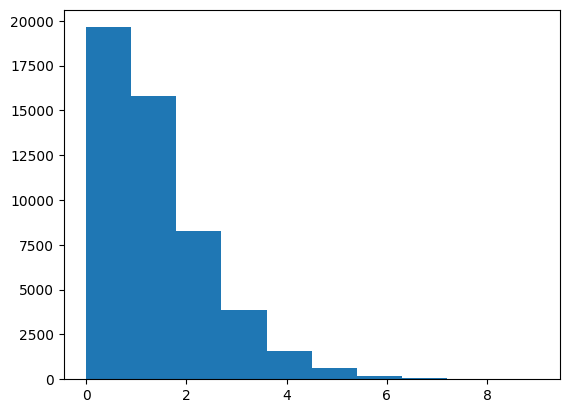

In [44]:
plt.hist(df['num_hard_inquiries_last_6'])

In [45]:
import numpy as np

def assign_credit_score_trend(row):
    emi_ratio = row['monthly_emi_outflow'] / (row['monthly_income'] + 1e-5)

    # Decrease: High risk behavior
    if (
        row['dpd_last_3_months'] > 30 and
        row['credit_utilization_ratio'] >= 0.7 and
        row['num_hard_inquiries_last_6'] > 1
    ):
        return np.random.choice(['Decrease', 'Stable'], p=[0.85, 0.15])

    # Increase: Very responsible borrower
    if (
        emi_ratio <= 0.2 and
        row.get('repayment_history_score', 0.5) >= 0.8
    ):
        return np.random.choice(['Increase', 'Stable'], p=[0.8, 0.2])

    # Decrease: Extremely high EMI burden
    if emi_ratio > 0.9:
        return np.random.choice(['Decrease', 'Stable'], p=[0.75, 0.25])

    # Stable or Decrease: Too many open loans
    if row['num_open_loans'] >= 5:
        return np.random.choice(['Stable', 'Decrease'], p=[0.5, 0.5])

    # Increase: Recently got a small loan and still has low credit utilization
    if (
        row['recent_loan_disbursed_amount'] < 0.2 * row['total_credit_limit'] and
        row['credit_utilization_ratio'] < 0.5
    ):
        return np.random.choice(['Increase', 'Stable'], p=[0.7, 0.3])

    # Mostly stable by default
    return np.random.choice(['Stable', 'Increase', 'Decrease'], p=[0.7, 0.15, 0.15])

# Apply to dataframe
df['target_credit_score_movement'] = df.apply(assign_credit_score_trend, axis=1)


In [46]:
df.head()

,customer_id,location,age,gender,monthly_income,monthly_emi_outflow,num_open_loans,total_credit_limit,months_since_last_default,current_outstanding,dpd_last_3_months,num_hard_inquiries_last_6,credit_utilization_ratio,recent_credit_card_usage,recent_loan_disbursed_amount,repayment_history_score,target_credit_score_movement
1,00001,Noida,34,F,68402,11017,1,514488,240,470420.0,1,1,0.914346,0.809645,136804.0,0.360,Stable
2,00002,Mumbai,29,F,39708,6526,2,288551,3,197187.0,0,0,0.683370,0.653300,0.0,0.350,Stable
3,00003,Gurgaon,42,M,106087,20145,5,759751,240,336706.0,20,4,0.443179,0.777369,0.0,0.378,Stable
4,00004,Gurgaon,28,M,49975,4656,1,323817,240,291225.0,0,0,0.899351,0.766941,102153.0,0.700,Stable
5,00005,Ahmedabad,29,M,55402,12311,2,414531,240,192933.0,0,2,0.465425,0.577841,165541.0,0.729,Stable


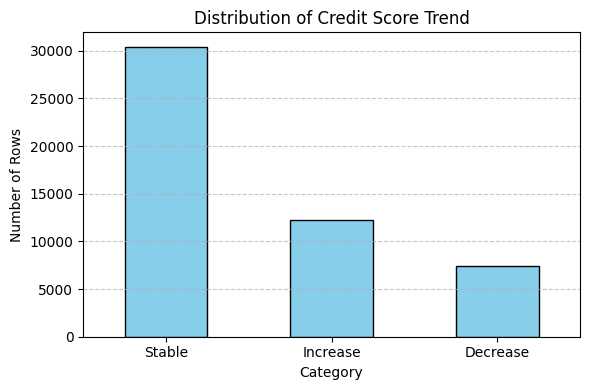

In [47]:
import matplotlib.pyplot as plt

# Count occurrences
category_counts = df['target_credit_score_movement'].value_counts()

# Plot
plt.figure(figsize=(6, 4))
category_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Labels
plt.title("Distribution of Credit Score Trend")
plt.xlabel("Category")
plt.ylabel("Number of Rows")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [ ]:
df.to_csv('credit_score_movement.csv', index=False)